<a href="https://colab.research.google.com/github/Arko04/Colab/blob/main/AI_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=230 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Project 1</b><br><br>Alireza Karimi</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=300 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>



# <b><font color='green'>Part $I$:</font></b>

### Mount my google drive

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


###find the datapath of our dataset

In [ ]:
path = "/content/grive/MyDrive/AI_Project1/Dataset/"

Carcinoma_DIR = path + "Carcinoma/"
Nevus_DIR = path + "Nevus/"
Melanoma_DIR = path + "Melanoma/"

### 'Image' module for displaying the images

In [ ]:
from IPython.display import Image

### Show some example images

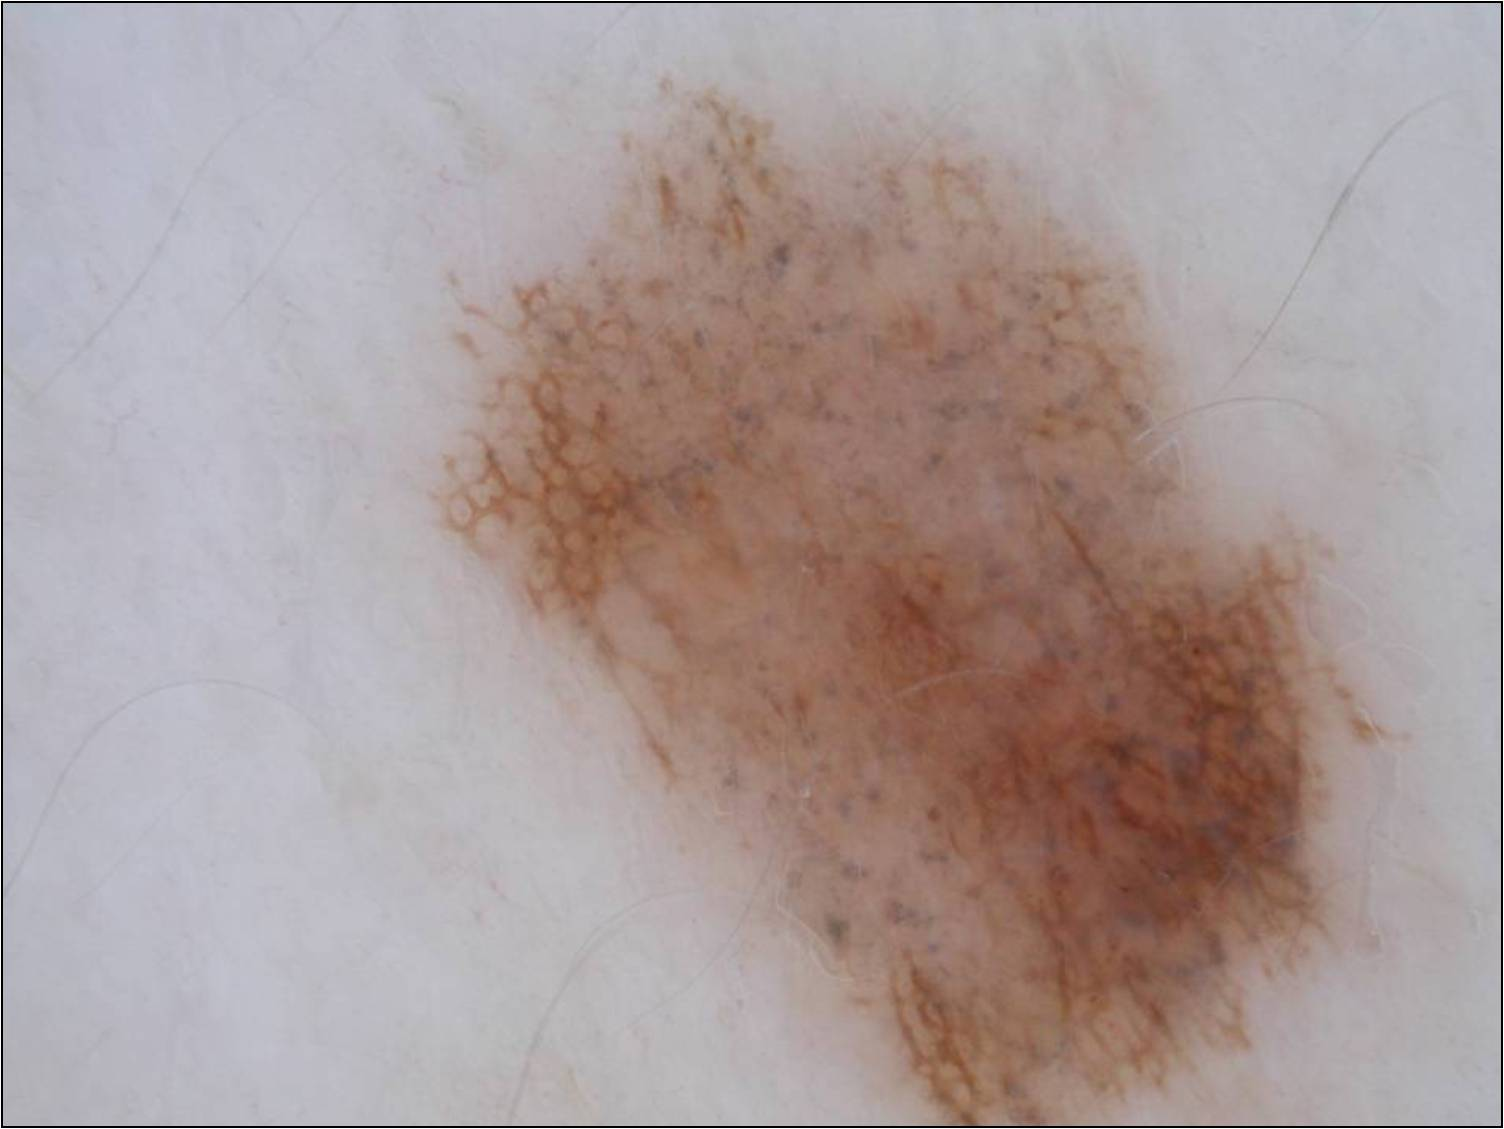

In [ ]:
Image(filename=Nevus_DIR + "ISIC_0000055.jpg", width = 250,height= 200)

### Import necessary library for working with files

In [ ]:
import os

### Print the 3 types of diseases

In [ ]:
mechanical_types = os.listdir(path)
print (mechanical_types)

['Carcinoma', 'Melanoma', 'Nevus']


### create a dictionary to restore all the image file's names

In [ ]:
image_files = {"Nevus":[],"Melanoma":[],"Carcinoma":[]}

### Iterating all the files of each directory and append them to image files

In [ ]:
# Images in Nevus directory
for file in os.listdir(Nevus_DIR):
    image_files["Nevus"].append(Nevus_DIR + file)

# Images in Carcinoma directory
for file in os.listdir(Carcinoma_DIR):
    image_files["Carcinoma"].append(Carcinoma_DIR + file)

# Images in Melanoma directory
for file in os.listdir(Melanoma_DIR):
    image_files["Melanoma"].append(Melanoma_DIR + file)

### Test if we restore correctly

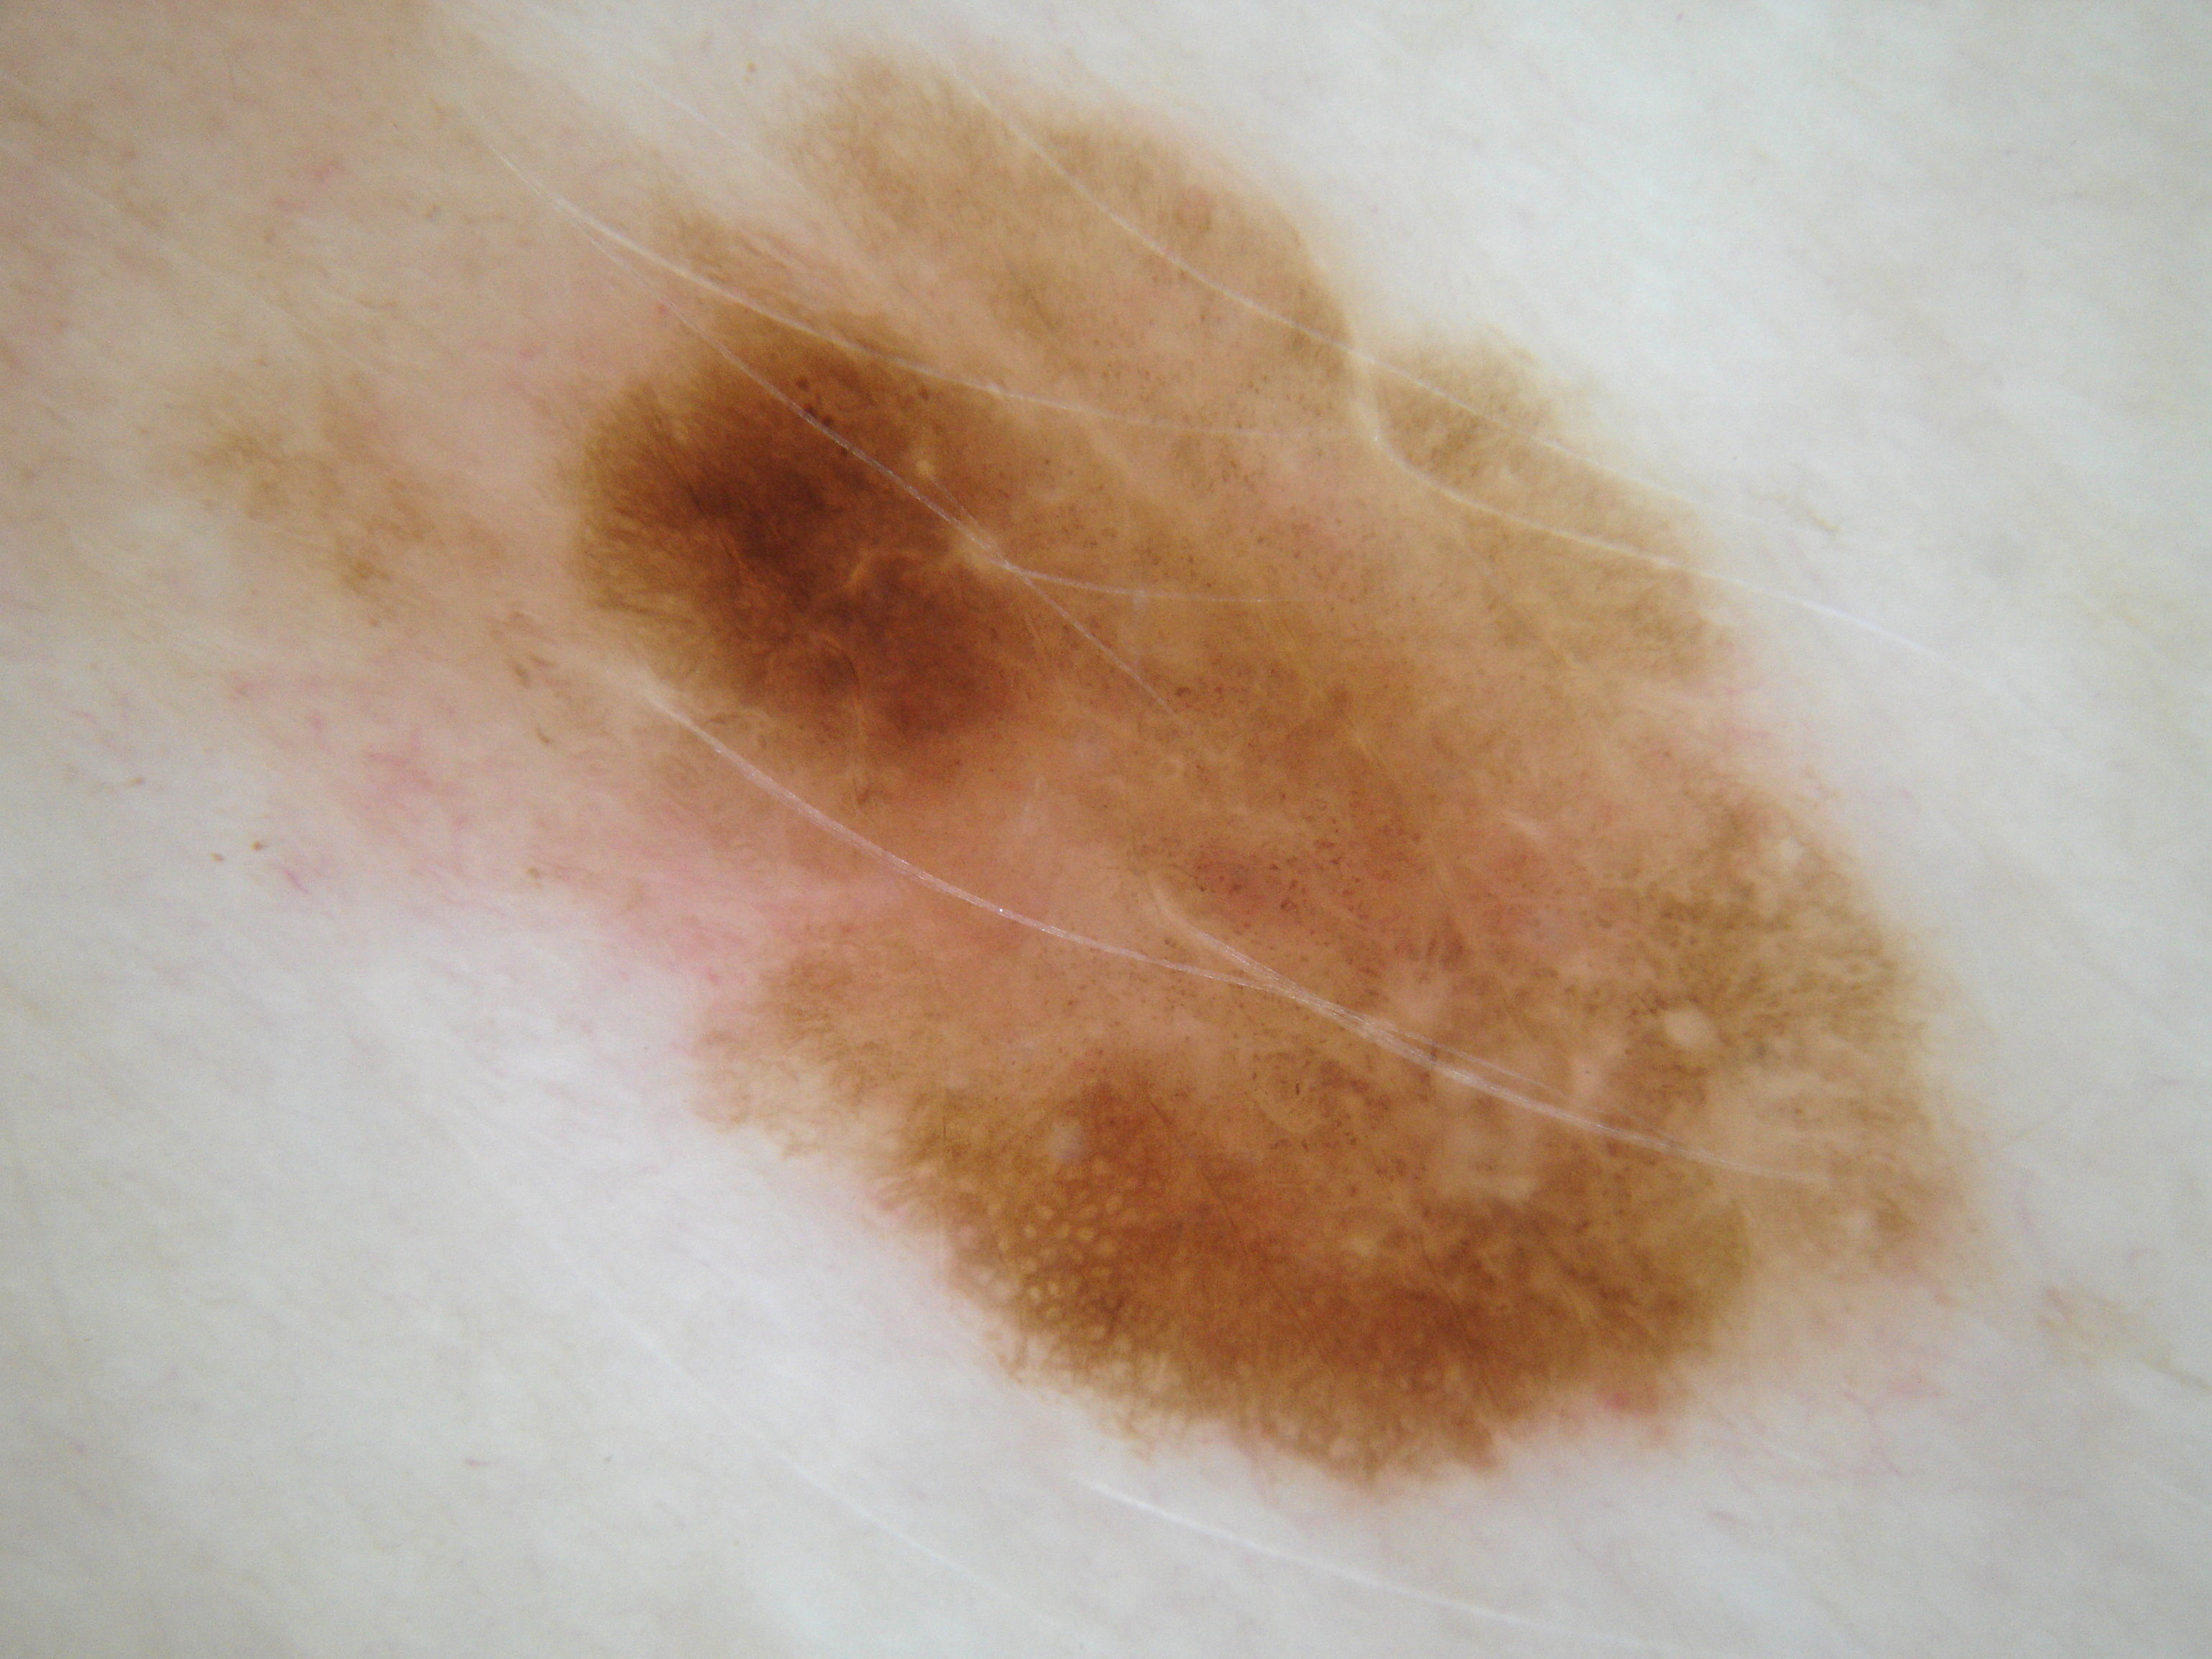

In [ ]:
Image(filename=image_files["Nevus"][0], width = 250,height= 200)

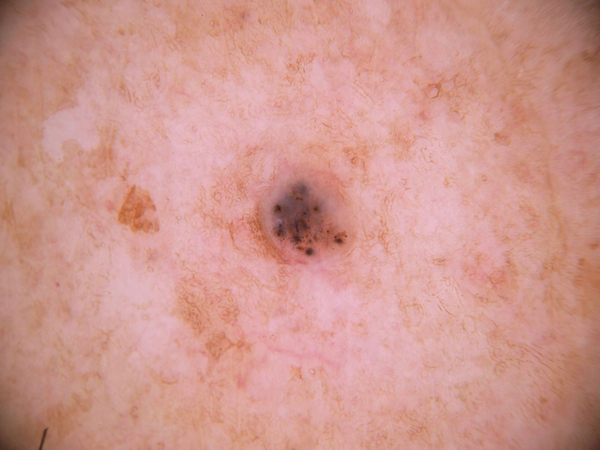

In [ ]:
Image(filename=image_files["Carcinoma"][0], width = 250,height= 200)

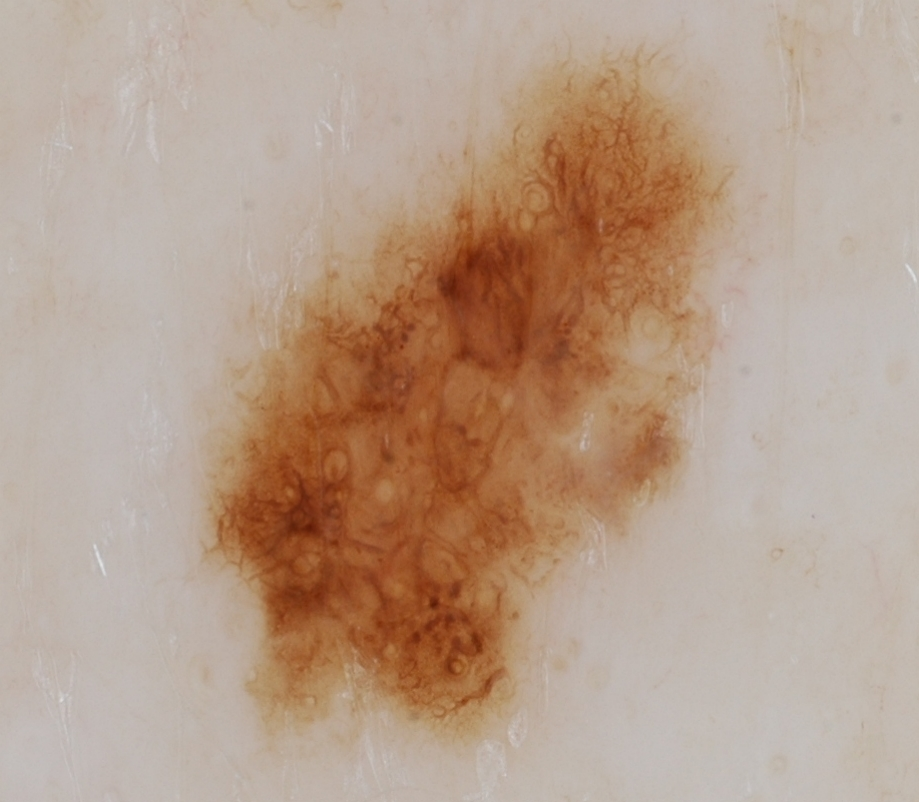

In [ ]:
Image(filename=image_files["Melanoma"][0], width = 250,height= 200)

### Test the size of each of them

In [ ]:
print(len(image_files["Nevus"]))
print(len(image_files["Carcinoma"]))
print(len(image_files["Melanoma"]))

59
50
64


### Outline

To use VGG16 and ResNet50 models for image classification tasks in TensorFlow, it is important to preprocess the input images properly, which includes normalizing the pixel values of the images. Here is a general procedure you can follow to train VGG16 and ResNet50 models on the given image datasets:

1. Load and Preprocess the Images:
   - Read the images from the folders (nevus, melanoma, noncancerous).
   - Resize the images to a common size (e.g., 224x224) to match the input shape of the VGG16 and ResNet50 models.
   - Normalize the pixel values of the images to be in the range [0, 1] by dividing the pixel values by 255.0.

2. Create Image Data Generators:
   - Use TensorFlow's `ImageDataGenerator` to load and preprocess images in batches for training and validation.
   - Specify the preprocessing functions including rescaling, data augmentation (optional), and other transformations.

3. Define and Compile the Models:
   - Import pre-trained VGG16 and ResNet50 models from Keras applications.
   - Remove the top layers (include_top=False) to add your custom classifier layer.
   - Add a Global Average Pooling layer followed by a Dense layer for classification.
   - Compile the models with appropriate loss function, optimizer, and metrics.

4. Train the Models:
   - Use the Image Data Generators to flow training and validation data to the model.
   - Train the models on the datasets using `model.fit` by specifying the number of epochs and batch size.

5. Evaluate and Predict:
   - Evaluate the performance of the trained models on a test set using `model.evaluate`.
   - Make predictions on new images using `model.predict`.

By following these steps, you can effectively train VGG16 and ResNet50 models on the given image datasets by properly preprocessing the images, including normalizing the pixel values. This preprocessing step helps in achieving better performance and convergence during model training.

### Import modules and libraries to work with images

In [ ]:
import tensorflow as tf
from PIL import Image

In [ ]:
# Load the JPG image file
image_path = image_files["Melanoma"][0]
image = tf.io.read_file(image_path)

# Decode the JPG image to pixels
image_tensor = tf.image.decode_jpeg(image)


###VGG:

VGG16 and VGG19 were originally trained on the ImageNet dataset with input images of size 224x224.
The VGG models have a fixed input size of 224x224 pixels, and it is recommended to resize your images to this size if you are using a pre-trained VGG model.
###ResNet:

ResNet models, such as ResNet-50 or ResNet-18, were also trained on ImageNet with input images of size 224x224.
It is recommended to use 224x224 images as input when working with ResNet architectures to maintain compatibility with pre-trained weights.

In [ ]:
# Resize the image to the desired size (224 x 224 x 3)
image_resized = tf.image.resize(image_tensor, [224, 224])

# Display the shape of the resized image tensor
print(image_resized.shape)

(224, 224, 3)


### Normalize the pixels

Typically in deep learning models like VGG16, VGG19, and ResNet, the input images are pre-processed and normalized before feeding them into the network. The pixel values of the images are usually scaled to fall within a certain range, often between 0 and 1, to ensure consistency and better convergence during training.

In [ ]:
# Normalize the pixel values by dividing by 255
image_normalized = image_resized / 255.0

In [ ]:
# Access the pixel values of the normalized image
pixels_normalized = image_normalized.numpy()

# Display the pixel values of the normalized image
print(pixels_normalized)
pixels_normalized.shape
type(pixels_normalized)

[[[0.7502713  0.72139657 0.6770105 ]
  [0.75351053 0.728055   0.6819592 ]
  [0.7592622  0.73210233 0.6868587 ]
  ...
  [0.7511259  0.7248128  0.6833212 ]
  [0.7542548  0.7225318  0.6812767 ]
  [0.74964136 0.72054476 0.67626953]]

 [[0.7533438  0.7254902  0.67275035]
  [0.74952734 0.72328436 0.6697392 ]
  [0.7611685  0.7317042  0.6876128 ]
  ...
  [0.75686276 0.73333335 0.6862745 ]
  [0.7529218  0.7176277  0.6823336 ]
  [0.75561076 0.7242382  0.6780371 ]]

 [[0.75312275 0.7217502  0.6707698 ]
  [0.7486082  0.7223652  0.66882   ]
  [0.75806195 0.7266894  0.675709  ]
  ...
  [0.7563387  0.7219052  0.68618083]
  [0.75468326 0.7272323  0.6880166 ]
  [0.74291927 0.7037036  0.6590189 ]]

 ...

 [[0.74724233 0.71979135 0.6946752 ]
  [0.7493641  0.72462666 0.70109725]
  [0.7599692  0.72266173 0.7138645 ]
  ...
  [0.76307666 0.7317041  0.6826323 ]
  [0.7533013  0.7297719  0.6827131 ]
  [0.75686276 0.7176471  0.6784314 ]]

 [[0.74009955 0.717927   0.68479496]
  [0.7512331  0.7264957  0.7029663 ]


numpy.ndarray

### define the function which derive the normalized pixel values of each image

In [ ]:
def get_pixels(image_path):

  # Read the JPG image file
  image = tf.io.read_file(image_path)

  # Decode the JPG image to pixels
  image_tensor = tf.image.decode_jpeg(image)

  # Resize the image to the desired size (224 x 224 x 3)
  image_resized = tf.image.resize(image_tensor, [224, 224])

  # Normalize the pixel values by dividing by 255
  image_normalized = image_resized / 255.0

  # Access the pixel values of the normalized image
  pixels_normalized = image_normalized.numpy()

  return pixels_normalized


### Create a dictionary for images

In [ ]:
images = {"Nevus":[],"Melanoma":[],"Carcinoma":[]}

### Make image and get their pixels from the image file's names

In [ ]:
for image_path in image_files["Nevus"]:
    image = get_pixels(image_path)
    images["Nevus"].append(image)

for image_path in image_files["Carcinoma"]:
    image = get_pixels(image_path)
    images["Carcinoma"].append(image)

for image_path in image_files["Melanoma"]:
    image = get_pixels(image_path)
    images["Melanoma"].append(image)

### Test if it works correctly

In [ ]:
print(images["Nevus"][0].shape)

print(images["Melanoma"][0])

AttributeError: 'list' object has no attribute 'shape'

### Test if the sizes remain the same

In [ ]:
print(len(images["Nevus"]))
print(len(images["Carcinoma"]))
print(len(images["Melanoma"]))

59
50
64
